1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [2]:
import pandas as pd
fpath = r"C:\Users\30495\Desktop\dase\open_rank_20236.csv"
pdata = pd.read_csv(fpath)

value_max = pdata['value'].max()
value_min = pdata['value'].min()
value_mean = pdata['value'].mean()
value_median = pdata['value'].median()
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [3]:
import pandas as pd
fpath = r"C:\Users\30495\Desktop\dase\activity_2022.csv"
pdata = pd.read_csv(fpath)

months = pdata.columns[1:]
rate_df = pd.DataFrame()
rate_df['repo'] = pdata['repo']
for i in range(len(months)-1):
    cur_month = months[i]
    next_month = months[i+1]
    rate = (pdata[next_month] - pdata[cur_month]) / pdata[cur_month].replace(0, 1e-5)
    rate_df[f'month{i+1}'] = rate

mean_rate = rate_df.iloc[:, 1:].mean(axis=1)

print(mean_rate)


0   -0.017928
1    0.000295
2   -0.022848
3   -0.003651
4    0.140824
5   -0.012404
6    0.008453
7    0.022905
8    0.013160
9   -0.003778
dtype: float64


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [4]:
fpath1 = r"C:\Users\30495\Desktop\dase\china_2022.csv"
fpath2 = r"C:\Users\30495\Desktop\dase\global_2022.csv"
pdata1 = pd.read_csv(fpath1)
pdata2 = pd.read_csv(fpath2)
print(f"各项数据均值的比值",pdata1[pdata1.columns[1:]].mean() / pdata2[pdata2.columns[1:]].mean())
print(f"各项数据中位数的比值",pdata1[pdata1.columns[1:]].median() / pdata2[pdata2.columns[2:]].median())
print(f"各项数据最大值的比值",pdata1[pdata1.columns[1:]].max() / pdata2[pdata2.columns[1:]].max())
print(f"各项数据最小值的比值",pdata1[pdata1.columns[1:]].min() / pdata2[pdata2.columns[1:]].min())

各项数据均值的比值 issue_comment      0.179273
open_issue         0.211759
open_pull          0.202734
review_comment     0.164940
merged_pull        0.220324
rank               1.000000
value              0.186558
rankDelta         53.000000
valueDelta         0.778119
dtype: float64
各项数据中位数的比值 issue_comment          NaN
merged_pull       0.411725
open_issue        0.318251
open_pull         0.324885
rank              1.000000
rankDelta              NaN
review_comment    0.154060
value             0.289804
valueDelta        0.695463
dtype: float64
各项数据最大值的比值 issue_comment      0.116755
open_issue         0.118387
open_pull          0.113877
review_comment     0.132412
merged_pull        0.103966
rank               1.000000
value              0.125318
rankDelta         25.000000
valueDelta         0.366607
dtype: float64
各项数据最小值的比值 issue_comment     0.149510
open_issue        0.057134
open_pull         0.066499
review_comment    0.060247
merged_pull       0.075561
rank              1.000000
val

P = (25% * 85%) / (75% * 10% + 25% * 85%) = 0.739130434782608

P = (35% * 50%) / (35% * 50% + 50% * 10%) = 0.777777777777777

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

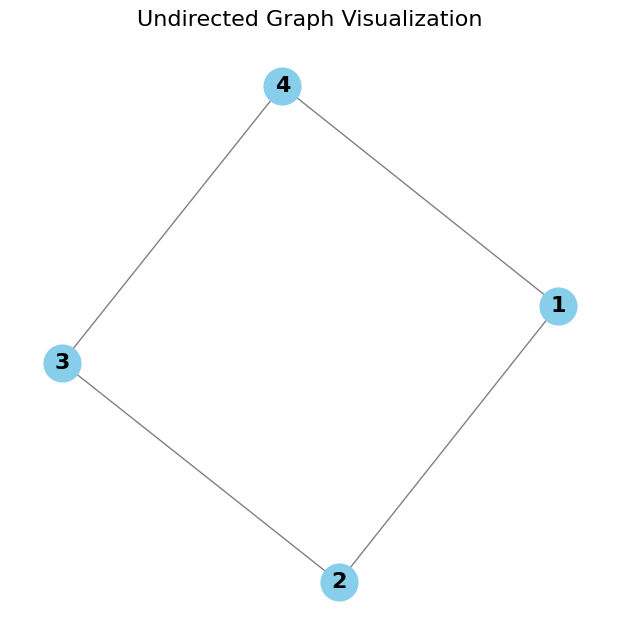

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]
G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)
plt.figure(figsize=(6,6))
nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", font_size=16, font_weight="bold", edge_color="gray")
plt.title("Undirected Graph Visualization", fontsize=16)
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

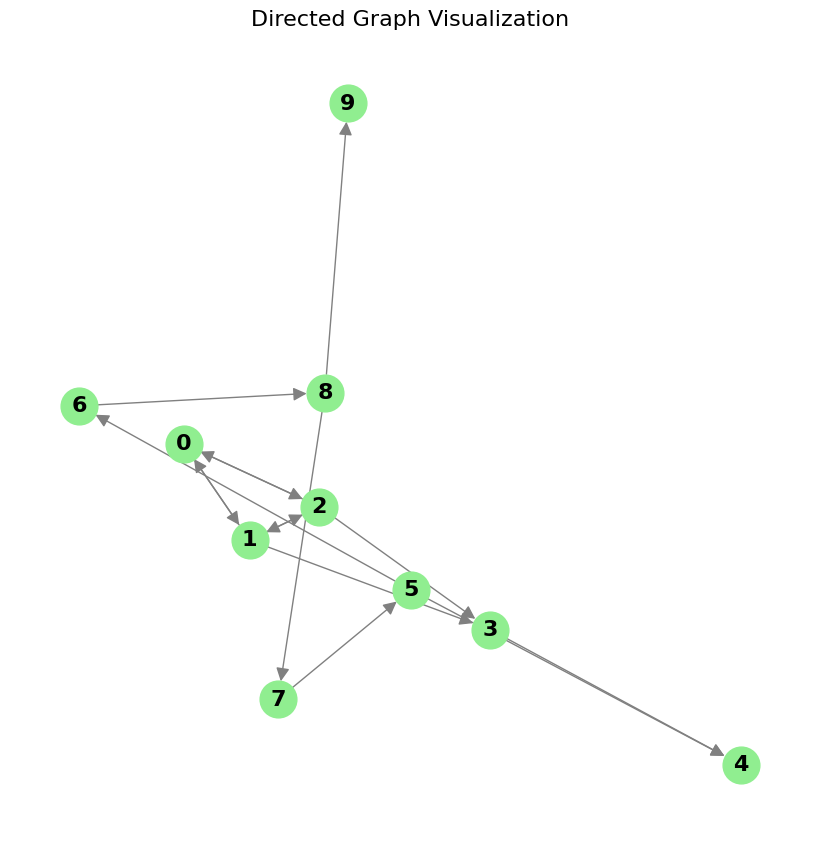

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), 
         (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=700, node_color="lightgreen", font_size=16, font_weight="bold", 
        edge_color="gray", arrowsize=20, font_color="black")
plt.title("Directed Graph Visualization", fontsize=16)
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank值：
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


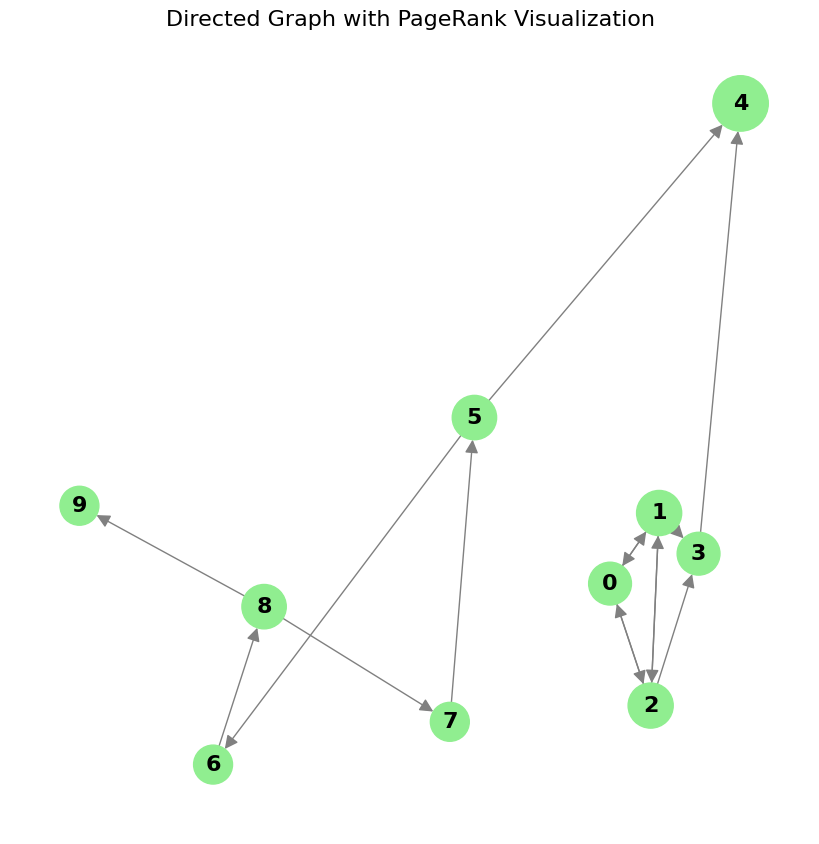

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4),
         (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pagerank_values = nx.pagerank(G)
print("PageRank值：")
for node, pr_value in pagerank_values.items():
    print(f"Node {node}: {pr_value:.4f}")
node_sizes = [pagerank_values[node] * 10000 for node in G.nodes()]
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=node_sizes, node_color="lightgreen", font_size=16, font_weight="bold", 
        edge_color="gray", arrowsize=20, font_color="black")
plt.title("Directed Graph with PageRank Visualization", fontsize=16)
plt.show()